In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [2]:
def arrowed_spines(ax=None, arrowLength=30, labels=('$E$', '$i$'), arrowStyle='<|-'):
    xlabel, ylabel = labels

    for i, spine in enumerate(['left', 'bottom']):
        # Set up the annotation parameters
        t = ax.spines[spine].get_transform()
        xy, xycoords = [1, 0], ('axes fraction', t)
        xytext, textcoords = [arrowLength, 0], ('offset points', t)

        # create arrowprops
        arrowprops = dict( arrowstyle=arrowStyle,
                           facecolor=ax.spines[spine].get_facecolor(), 
                           linewidth=ax.spines[spine].get_linewidth(),
                           alpha = ax.spines[spine].get_alpha(),
                           zorder=ax.spines[spine].get_zorder(),
                           linestyle = ax.spines[spine].get_linestyle() )

        if spine is 'bottom':
            ha, va = 'left', 'center'
            xarrow = ax.annotate(xlabel, xy, xycoords=xycoords, xytext=xytext, 
                        textcoords=textcoords, ha=ha, va='center',
                        arrowprops=arrowprops)
        else:
            ha, va = 'center', 'bottom'
            yarrow = ax.annotate(ylabel, xy[::-1], xycoords=xycoords[::-1], 
                        xytext=xytext[::-1], textcoords=textcoords[::-1], 
                        ha='center', va=va, arrowprops=arrowprops)
    return xarrow, yarrow

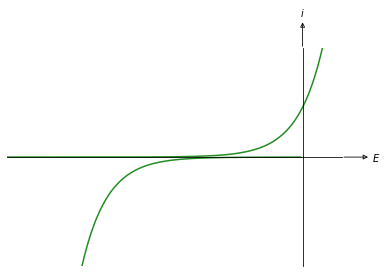

In [9]:
j0 = 0.005
alphaZn = 0.1
alphaHZn = 0.8
alphaFe = 0.15
alphaHFe = 0.85
alphaPb = 0.1
alphaHPb = 0.9

F = 96485.3329
R = 8.314
T = 298

#### A l electrode de Zinc
EeqZn = -0.8
EZn = np.arange(-3,3,0.01)
EeqHZn = -3*0.06 - 0.75  # a ph 3 - la surtension due au contact avec le metal 
EHZn = np.arange(-5,0,0.01)

#### A l electrode de Fer
EeqFe = -0.44+0.1
EFe = np.arange(-3,3,0.01)
EeqHFe = -4*0.06 - 0.40  # a ph 3 - la surtension due au contact avec le metal 
EHFe = np.arange(-5,0,0.01)

#### A l electrode de Plomb
EeqPb = -0.13
EPb = np.arange(-3,3,0.01)
EeqHPb = -4*0.06 - 0.65  # a ph 3 - la surtension due au contact avec le metal 
EHPb = np.arange(-5,0,0.01)

########################## Courbe Butler Volmer des electrodes : 

jZn = j0 * np.exp(((alphaZn * 2 * F) / (R * T)) * (EZn - EeqZn)) #Butler Volmer
jHZn = - j0 * np.exp(-(((1-alphaHZn) * 2 * F) / (R * T)) * (EHZn - EeqHZn)) 

jFe = j0 * np.exp(((alphaFe * 2 * F) / (R * T)) * (EFe - EeqFe))
jHFe = - j0 * np.exp(-(((1-alphaHFe) * 2 * F) / (R * T)) * (EHFe - EeqHFe))

jPb = j0 * np.exp(((alphaPb * 2 * F) / (R * T)) * (EPb - EeqPb))
jHPb = - j0 * np.exp(-(((1-alphaHPb) * 2 * F) / (R * T)) * (EHPb - EeqHPb))
##########################  Potentiel Mixte et courant de corrosion a l abandon : 

EmZn = ((1-alphaHZn) / (1 + alphaZn - alphaHZn)) * EeqHZn + ( alphaZn / (1 + alphaZn - alphaHZn)) * EeqZn
jcorrZn = j0 * np.exp(((alphaZn * 2 * F) / (R * T)) * (EmZn - EeqZn))

EmFe = ((1-alphaHFe) / (1 + alphaFe - alphaHFe)) * EeqHFe + ( alphaFe / (1 + alphaFe - alphaHFe)) * EeqFe
jcorrFe = j0 * np.exp(((alphaFe * 2 * F) / (R * T)) * (EmFe - EeqFe))

EmPb = ((1-alphaHPb) / (1 + alphaPb - alphaHPb)) * EeqHPb + ( alphaPb / (1 + alphaPb - alphaHPb)) * EeqPb
jcorrPb = j0 * np.exp(((alphaPb * 2 * F) / (R * T)) * (EmPb - EeqPb))

##########################  Potentiel Mixte et courant de corrosion connectees Parfait : 

Em = ((1-alphaHFe) / (1 + alphaZn - alphaHFe)) * EeqHFe + ( alphaZn / (1 + alphaZn - alphaHFe)) * EeqZn
jcorr = j0 * np.exp(((alphaZn * 2 * F) / (R * T)) * (Em - EeqZn))

##########################  Potentiel Mixte et courant de corrosion connectees Reel : 

EmRZn = 1.02 * Em
jcorrR = j0 * np.exp(((alphaZn * 2 * F) / (R * T)) * (EmRZn - EeqZn))
EmRFe = - np.log(jcorrR/j0) * R*T / (2*F) * 1 / (1-alphaHFe) + EeqHFe


fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ylim(-0.03,0.03)
plt.xlim(-1.5,0.2)

#plt.plot(EZn,jZn, color='tomato')
#plt.plot(EHZn,jHZn, color='tomato')
#plt.plot([EmZn , EmZn] , [-jcorrZn,jcorrZn], linestyle='dashed' , linewidth=1 , alpha = 1, color = 'tomato')
#plt.plot([EmZn , 0] , [jcorrZn,jcorrZn], linestyle='dashed' , linewidth=1 , alpha = 1, color = 'tomato')
#plt.plot([EmZn , 0] , [-jcorrZn,-jcorrZn], linestyle='dashed' , linewidth=1 , alpha = 1, color = 'tomato')

#plt.plot(EFe,jFe, color='royalblue')
#plt.plot(EHFe,jHFe, color='royalblue')
#plt.plot([EmFe , EmFe] , [-jcorrFe,jcorrFe], linestyle='dashed' , linewidth=1 , alpha = 1, color = 'royalblue')
#plt.plot([EmFe , 0] , [jcorrFe,jcorrFe], linestyle='dashed' , linewidth=1 , alpha = 1, color = 'royalblue')
#plt.plot([EmFe , 0] , [-jcorrFe,-jcorrFe], linestyle='dashed' , linewidth=1 , alpha = 1, color = 'royalblue')

plt.plot(EPb,jPb, color='forestgreen')
plt.plot(EHPb,jHPb, color='forestgreen')
#plt.plot([EmPb , EmPb] , [-jcorrPb,jcorrPb], linestyle='dashed' , linewidth=1 , alpha = 1, color = 'forestgreen')
#plt.plot([EmPb , 0] , [jcorrPb,jcorrPb], linestyle='dashed' , linewidth=1 , alpha = 1, color = 'forestgreen')
#plt.plot([EmPb , 0] , [-jcorrPb,-jcorrPb], linestyle='dashed' , linewidth=1 , alpha = 1, color = 'forestgreen')

#plt.plot([Em , Em] , [-jcorr,jcorr], linestyle='dashed', linewidth=1 , color = 'black')
#plt.plot([Em , 0] , [jcorr,jcorr], linestyle='dashed' , linewidth=1 , color = 'black')
#plt.plot([Em , 0] , [-jcorr,-jcorr], linestyle='dashed' , linewidth=1 , color = 'black')#

#plt.plot([EmRZn , EmRZn] , [0,jcorrR], linestyle='dashed', linewidth=1 , color = 'black')
#plt.plot([EmRZn , 0] , [jcorrR,jcorrR], linestyle='dashed' , linewidth=1 , color = 'black')
#plt.plot([EmRFe , EmRFe] , [0,-jcorrR], linestyle='dashed', linewidth=1 , color = 'black')
#plt.plot([EmRFe , 0] , [-jcorrR,-jcorrR], linestyle='dashed' , linewidth=1 , color = 'black')


#Deplacer l'axe gauche et bas au centre
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Masker l'axe droit et haut
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

arrowed_spines(ax)

plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.tick_params(axis=u'both', which=u'both',length=0)


plt.ylabel('')

#plt.savefig ( 'Plomb.pdf',transparent=True,format='pdf')

plt.show()